In [2]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']

In [8]:
X.shape

(70000, 784)

In [15]:
some_digit = X[27]
some_digit_image = some_digit.reshape(28,28)

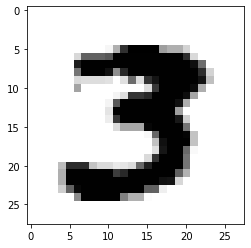

In [16]:
plt.imshow(some_digit_image, cmap= "binary")

In [17]:
y[27]

'3'

In [25]:
y = y.astype('int64')

### Creating Training & Test Sets

In [26]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [27]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state= 42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
predictions_5 = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_5, predictions_5)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, predictions_5)

0.8370879772350012

In [37]:
recall_score(y_train_5, predictions_5)

0.6511713705958311

In [38]:
f1_score(y_train_5, predictions_5)

0.7325171197343846

In [39]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method= "decision_function")

In [41]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [45]:
def plot_precision_recall(precision, recall, threshold) :
    plt.plot(threshold, precisions[:-1], "b--", label = "Precision")
    plt.plot(threshold, recalls[:-1], "r-", label = "Recall")
    plt.legend()

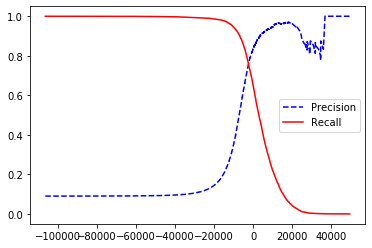

In [46]:
plot_precision_recall(precisions, recalls, threshold)

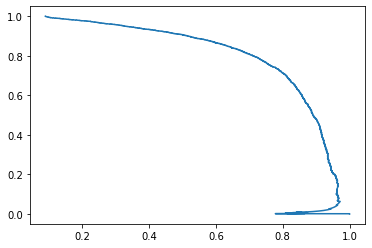

In [47]:
plt.plot(precisions, recalls)

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [50]:
def plot_roc_curve(fpr, tpr, label = None) :
    plt.plot(fpr, tpr, linewidth = 2, label =label)
    plt.plot([0,1], [0,1], "b--")

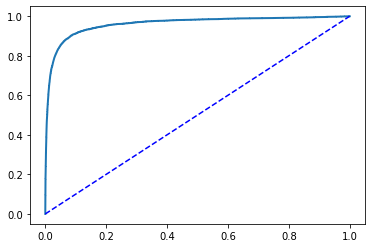

In [51]:
plot_roc_curve(fpr, tpr)

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [54]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [56]:
y_prob = cross_val_predict(random_forest, X_train, y_train_5, cv = 3, method="predict_proba")

In [60]:
y_scores_proba = y_prob[:,1]

In [61]:
fpr_forest, tpr_forest, threshold = roc_curve(y_train_5, y_scores_proba)

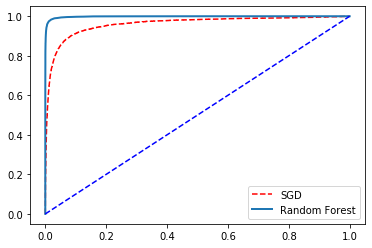

In [64]:
plt.plot(fpr, tpr, "r--", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, label= "Random Forest")
plt.legend()

In [65]:
roc_auc_score(y_train_5, y_scores_proba)

0.9983656082376952